# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Inteligencia Artificial y Aprendizaje Automático**
### Tecnológico de Monterrey
### Prof. Luis Eduardo Falcón Morales

## **Actividad de la Semana 6**
### **Árboles de decisión y bosque aleatorio.**

**Nombres y matrículas de los integrantes del equipo:**

* Jonathan Garza Bennet | 
* Diego Fernando Guerra Burgos | 
* Fernando Maytorena Espinosa de los Monteros | A01110946 
* José Francisco Miranda García |  

## Riesgo Crediticio
El asignar un crédito sabemos que conlleva un riesgo para el prestamista en caso de que el deudor no 
pague al final la cantidad asignada, o inclusive el equivocarnos al negarle el préstamo a alguien que sí 
era confiable. Durante décadas se ha tratado de resolver dicho problema desde muchas áreas del 
conocimiento y en particular las técnicas de Aprendizaje Automático (Machine Learning) han brindado 
y siguen proporcionando nuevas formas de enfrentar este problema.

No existen muchas bases de datos abiertas bien documentadas sobre este problema, sin embargo los 
datos del archivo SouthGermanCredit.asc del South_German_Credit_Data_Set de la página de la UCI es 
una sobre la cual se hace mucha investigación en torno a minimizar el riesgo en la asignación de 
créditos. En esta tarea se trabajará con dichos datos y los puedes encontrar dentro del archivo zip de la 
siguiente liga:  https://archive.ics.uci.edu/ml/datasets/South+German+Credit

En la página de la liga anterior también se encuentra el archivo codetable.txt en el archivo zip. Ahí 
puedes encontrar más información detallada sobre el significado y tipo de cada variable. 
Al menos en las siguientes ligas puedes encontrar mayor información de dichos datos: 
- https://www.kaggle.com/competitions/south-german-credit-prediction/overview  
- https://www.semanticscholar.org/paper/South-German-Credit-Data-Classification-Using-to-Religia-Pranoto/219c9968cfa2cbb802376cf88035fe5e664b4418  
- https://ieeexplore.ieee.org/document/9239944  

Así, con base a datos históricos, el objetivo es predecir si una persona es clasificada como confiable a la 
asignación de un crédito, o no lo es. La variable de salida se llama “kredit”.  

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [73]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedStratifiedKFold, learning_curve, validation_curve
from sklearn.metrics import make_scorer

# **Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como 
se indica en la página de la UCI.

NOTA: Si lo deseas, puedes traducirlos y ponerlas en español.

In [74]:
# Primero, cargamos los datos utilizando la carpeta zip que se describe en las instrucciones.
# zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'

#df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc", sep=' ')
df = pd.read_csv("https://raw.githubusercontent.com/a01110946/iayaa-Equipo-50/main/SouthGermanCredit.asc.txt", sep=' ')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [75]:
#Para poder tener el archivo desde github sin tenerlo local, lo subimos a github en forma publica, y le damos click en el boton "raw" y nos da la dirección, recordar que tiene que estar publico
#df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SouthGermanCredit.asc', sep='\s+')
#df= pd.read_csv('https://github.com/a01110946/iayaa-Equipo-50/blob/main/SouthGermanCredit.asc.txt', sep='\s')
# df.head()

In [76]:
# Después de cargar los datos, reemplazamos los nombres de las columnas de alemán a inglés, siguiendo los nombres proporcionados en el archivo de descripción.
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)

df.describe()
# Con el método describe() podemos ver las estadísticas básicas de cada columna numérica; y aprovechamos para ver los nombres de las columnas en inglés. 

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


# **Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida. 

In [77]:
X = df.iloc[:,0:20]
y = df.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)
X_train.head()
df.columns

print("Registros de Entrenamiento: \n" + str(X_train.columns) + "\n")
print("Registros de Validación: \n" + str(X_val.columns))

#Calcular el tamaño del conjunto original para verificar
X_size=len(X)
print("\nEl tamaño del conjunto de datos original es: " + str(X_size) + "\n")

#Calcular el tamaño del conjunto de entrenamiento para verificar
X_train_size=len(X_train)
print("El tamaño del conjunto entrenamiento es: " + str(X_train_size) + "\n")

#Calcular el tamaño del conjunto de entrenamiento para verificar
X_val_size=len(X_val)
print("El tamaño del conjunto de validación o prueba es: " + str(X_val_size) + "\n")

#Calcular el porcentaje del conjunto de entrenamiento
print("El porcentaje del conjunto de entrenamiento es: " + str(X_train_size/X_size*100) + "\n")

#Calcular el porcentaje del conjunto de validación o prueba
print("El porcentaje del conjunto de entrenamiento es: " + str(X_val_size/X_size*100) + "\n")

Registros de Entrenamiento: 
Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')

Registros de Validación: 
Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')

El tamaño del conjunto de datos original es: 1000

El tamaño del conjunto entrenamiento es: 850

El tamaño del conjunto de validación o prueba es: 150

El porcentaje del conjunto de entrenamiento es: 85.0

El porcen

In [78]:
# El dataseto original cuenta con 1,000 registros; después de hacer la partición de los datos, el dataset de entrenamiento cuenta con 850 registros y el de validación con 150 registros.
# Para comprobarlo, utilizamos el método describe en ambos conjuntos (X_train y X_val).
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.595294,20.462353,2.527059,2.851765,3216.104706,2.121176,3.384706,2.981176,2.690588,1.155294,2.852941,2.34000,35.603529,2.663529,1.924706,1.402353,2.900000,1.848235,1.403529,1.963529
std,1.260425,11.726531,1.077600,2.762129,2748.335186,1.590060,1.228442,1.114049,0.714666,0.491987,1.102849,1.04928,11.464257,0.716431,0.524074,0.570573,0.651627,0.359004,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1374.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2301.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3959.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [79]:
X_val.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.473333,23.400000,2.646667,2.693333,3583.726667,2.013333,3.380000,2.926667,2.633333,1.086667,2.80000,2.460000,35.193333,2.740000,1.946667,1.433333,2.926667,1.826667,1.406667,1.960000
std,1.240787,13.566144,1.112085,2.646884,3204.377733,1.523801,1.090963,1.147490,0.669736,0.383146,1.11126,1.053151,10.728308,0.639106,0.565052,0.617602,0.666521,0.379803,0.492857,0.196616
min,1.000000,4.000000,0.000000,0.000000,433.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1339.500000,1.000000,3.000000,2.000000,2.000000,1.000000,2.00000,2.000000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,24.000000,2.000000,2.000000,2545.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.00000,3.000000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,30.000000,4.000000,3.000000,4591.500000,3.000000,4.000000,4.000000,3.000000,1.000000,4.00000,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,60.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.00000,4.000000,74.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


# **Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha información realiza un Pipeline que incluya al menos las siguientes transformaciones:
1. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).
2. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.
3. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.

In [80]:
# Primero, dividimos el dataframe original en cuatro dataframes, uno por cada tipo de variable, según la descripción de UCI.

# Variables categóricas (categorical)
df_categorical = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing']

# Variables numéricas ordinales/discretas (ordinal; discretized quantitative)
df_discretized_quantitative = ['employment_duration','installment_rate','present_residence','property','number_credits','job', 'people_liable']

# Variables numéricas continuas (quantitative)
df_continuous_quantitative = ['duration','amount','age']

# Variables binarias (binary)
# Estoy dejando fuera 'credit_risk' porque es la variable objetivo.
df_binary = ['telephone','foreign_worker']

In [81]:
# Para realizar imputación de datos faltantes, primero debemos revisar si tenemos datos faltantes en nuestro dataset.
# Para ello, utilizamos el método isnull() y sumamos los valores de cada columna.
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

 Según vemos en el resultado, no tenemos datos faltantes en nuestro dataset.

In [82]:
# El siguiente paso del ejercicio es escalar los datos numéricos, para que todos los valores estén en el mismo rango.
# Para ello, utilizamos el método StandardScaler() de la librería sklearn.preprocessing.

# Primero, debemos agrupar las variables numéricas en un solo dataframe, pero, como solo aplicaremos las transformaciones al conjunto de entrenamiento, entonces solo dividiremos las variables numéricas del conjunto de entrenamiento.
X_train_quantitative = X_train[df_discretized_quantitative + df_continuous_quantitative]

# Ahora, aplicamos la transformación MinMaxScaler() a las variables numéricas del conjunto de entrenamiento para poner a todas las variables en el mismo rango numérico.
X_train_quantitative_scaler = MinMaxScaler(feature_range=(1,2)).fit(X_train_quantitative)
X_train_quantitative_scaled = pd.DataFrame(X_train_quantitative_scaler.transform(X_train_quantitative))
X_train_quantitative_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,1.50,2.0,1.000000,1.000000,1.0,1.666667,2.0,1.117647,1.048232,1.053571
1,1.25,2.0,1.000000,1.333333,1.0,1.333333,2.0,1.294118,1.095381,1.089286
2,1.25,2.0,2.000000,1.333333,1.0,1.666667,2.0,1.117647,1.034724,1.607143
3,1.50,2.0,2.000000,2.000000,1.0,1.666667,2.0,1.470588,1.154253,1.553571
4,1.50,1.0,1.333333,1.333333,1.0,1.666667,2.0,1.470588,1.502262,1.196429


In [83]:
# Después, para aplicar la transformación One-Hot Encoder a las variables categóricas del conjunto de entrenamiento, primero debemos agrupar las variables categóricas en un solo dataframe.
X_train_catbin = X_train[df_categorical + df_binary]
X_train_catbin.head()

,status,credit_history,purpose,savings,personal_status_sex,other_debtors,other_installment_plans,housing,telephone,foreign_worker
548,2,2,0,4,4,1,3,2,1,2
335,1,2,2,1,3,2,3,2,1,1
793,1,2,6,1,2,1,3,2,1,2
848,2,2,3,2,2,2,3,3,1,2
295,4,2,1,1,2,1,1,2,1,2


In [84]:
# Ahora, podemos aplicar la transformación One-Hot Encoder al dataframe X_train_catbin.
#X_train_catbin_encoded = pd.get_dummies(X_train_catbin)
#X_train_catbin_encoded.head()

#X_train_catbin_pipeline = pipeline.Pipeline(steps = [('imp_mostfrequent', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])

#X_train_catbin_pipeline.fit(X_train_catbin)
#X_train_catbin_encoded = X_train_catbin_pipeline.transform(X_train_catbin)
#pd.DataFrame(X_train_catbin_encoded.toarray(), columns = X_train_catbin_pipeline['OneHotE'].get_feature_names()).head(10)

# Se crean Pipelines con todos los requerimientos del ejercicio 3

# Transformaciones a factores numéricos de entrada:

#Se crea un pipeline para la imputación y transformación de datos cuantitativos. Se selecciona la mediana como método de sustitución de datos faltantes como estrategia para
#utilizar el valor central de los datos y no tener mucho sesgo causado por outliers como se tendría con el promedio
#Se utiliza el escalador MinMax para traer todos los datos a valores equiparables sin importar su magnitud original y así evitar que sean predominantes durante
#el proceso de aprendizaje
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])

#Los nombres de las variables cuantitativas se agrupan a continuación
num_pipeline_nombres = df_discretized_quantitative + df_continuous_quantitative

# Transformaciones a factores categóricos de entrada:

#Se crea un pipeline para la imputación y transformación de datos cuantitativos. Se selecciona la moda como método de imputación debido a que en valores categóricos, la media o mediana no ofrecen una buena métrica para este tipo de valores
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))]) 
catImp_pipeline_nombres = df_categorical

#Se aplica One-Hot Encoder en las variables categóricas:
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = df_categorical

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')


# **Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás 
llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR (*for loop*). Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características:
1. Usa los parámetros predeterminados de cada modelo.
2. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas).
3. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.
4. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta.
5. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:
   1. Obtener las curvas de aprendizaje (*learning_curve*) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “*f1-score*”, como evaluación del desempeño de dicha función “*learning_curve()*”.
   2. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.
   3. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.

In [85]:
# Similar a como lo vimos en actividades anteriores, iniciamos definiendo una función llamada get_models, en la cual creamos dos listas para ir agregando los modelos y sus nombres.
def get_models():
  modelos = list()
  nombres = list()

# Luego creamos cada uno de los modelos solicitados:

  # LogReg - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LogReg')

  # DecTree - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DecTree')
  
  #RandForest - Ranfom Forest
  modelos.append(RandomForestClassifier())
  nombres.append('RandForest')
  
  return modelos, nombres

In [86]:
# Se definen las métricas de desempeño sin utilizar la librearía sklearn, como se solicita en las instrucciones:

def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

def mi_gmean(yreal, ypred):
  tn,fp,fn,tp= confusion_matrix(yreal,ypred).ravel()
  recall = mi_recall(yreal, ypred)
  especificidad= tn / (tn+fp)
  gmean = np.sqrt(recall*especificidad)
  return gmean

In [87]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()

#Se incluyen todas las métricas requeridasen un diccionario
mismetricas = {'accuracy':make_scorer(mi_accuracy), 'precision': make_scorer(mi_precision),
               'recall': make_scorer(mi_recall), 'f1score': make_scorer(mi_f1score) , 'gmean':make_scorer(mi_gmean)}

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
  scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=cv)

  #Se juntan todos los resultados
  resultados.append(scores)
  
  #Se despliegan todos los resultados de la validación cruzada
  print('%s:\nCross Val mean Accuracy: %.3f (%.4f)\nCross Val mean Precision: %.3f (%.4f)\nCross Val Recal: %.3f (%.4f)\nCross Val f1score: %.3f (%.4f)\nCross Val gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']), 
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),  
                                                                          np.mean(scores['test_f1score']),
                                                                          np.std(scores['test_f1score']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean']),))
  #Se ajustan los datos al modelo actual
  pipeline.fit(X_train,y_train)

  #Se calculan los valores predecidos del conjunto de entrenamiento
  yhat_train = pipeline.predict(X_train)

  #Se calculan los valores predecidos del conjunto de validación
  yhat_val = pipeline.predict(X_val)

  #Se calculan las metricas totales de desempeño del para el conjunto de entrenamiento
  train_accuracy = mi_accuracy(y_train, yhat_train)
  train_precision = mi_precision(y_train, yhat_train)
  train_recall = mi_recall(y_train, yhat_train)
  train_f1score = mi_f1score(y_train, yhat_train)
  train_gmean = mi_gmean(y_train, yhat_train)

  #Se calculan las metricas totales de desempeño del para el conjunto de validación
  val_accuracy = mi_accuracy(y_val, yhat_val)
  val_precision = mi_precision(y_val, yhat_val)
  val_recall = mi_recall(y_val, yhat_val)
  val_f1score = mi_f1score(y_val, yhat_val)
  val_gmean = mi_gmean(y_val, yhat_val)

  #Se imprimen los resultados de las métricas totales de desempeño para ambos conjuntos
  print('Train Accuracy: %.3f\nVal Accuracy: %.3f' % (train_accuracy, val_accuracy))
  print('Train Precision: %.3f\nVal Precision: %.3f' % (train_precision, val_precision))
  print('Train Recall: %.3f\nVal Recall: %.3f' % (train_recall, val_recall))
  print('Train f1score: %.3f\nVal f1score: %.3f' % (train_f1score, val_f1score))
  print('Train Gmean: %.3f\nVal f1score: %.3f\n' % (train_gmean, val_gmean))

LogReg:
Cross Val mean Accuracy: 0.757 (0.0313)
Cross Val mean Precision: 0.802 (0.0227)
Cross Val Recal: 0.874 (0.0325)
Cross Val f1score: 0.836 (0.0221)
Cross Val gmean: 0.641 (0.0519)

Train Accuracy: 0.780
Val Accuracy: 0.733
Train Precision: 0.812
Val Precision: 0.769
Train Recall: 0.897
Val Recall: 0.847
Train f1score: 0.852
Val f1score: 0.806
Train Gmean: 0.667
Val f1score: 0.663

DecTree:
Cross Val mean Accuracy: 0.684 (0.0300)
Cross Val mean Precision: 0.782 (0.0173)
Cross Val Recal: 0.767 (0.0397)
Cross Val f1score: 0.774 (0.0252)
Cross Val gmean: 0.607 (0.0293)

Train Accuracy: 1.000
Val Accuracy: 0.753
Train Precision: 1.000
Val Precision: 0.796
Train Recall: 1.000
Val Recall: 0.837
Train f1score: 1.000
Val f1score: 0.816
Train Gmean: 1.000
Val f1score: 0.706

RandForest:
Cross Val mean Accuracy: 0.760 (0.0274)
Cross Val mean Precision: 0.791 (0.0170)
Cross Val Recal: 0.899 (0.0324)
Cross Val f1score: 0.841 (0.0193)
Cross Val gmean: 0.615 (0.0426)

Train Accuracy: 1.000
Val

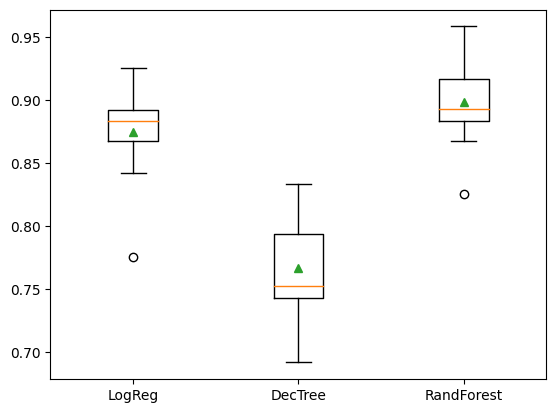

In [88]:
#Se declara una lista vacía para guardar sólo los resultados de recall de proceso de entrenamiento
resultados_recall=[]

#Se extraen los resultados sólo de recall para todos los modelos y se asignan a la lista
for i in range(len(resultados)):
  resultados_recall.append(resultados[i]['test_recall'])

#Se realiza el gráfico de cajas y bigotes
plt.boxplot(resultados_recall, labels=nombres, showmeans=True)
plt.show()

##### Curvas de aprendizaje:

In [89]:
def mi_LearningCurvePlot_RegLog(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('f1score')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [90]:
def mi_ModeloYCurvas_RegLog(Xin):
       # Se usa el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 0.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = LogisticRegression(max_iter=1000) #100 iteraciones son default, se necesita más para que el model converja

       #S define el pipeline como se indicó:

       mi_pipe = Pipeline(steps = [('escalar',   MinMaxScaler(feature_range=(1,2))),('modelo', modelo)])


       #Se aplica validación cruzada estratificada y con repeticiones.

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)


       # Genera un arreglo con los 20 valores de los tamaños de muestra:
       
       delta_train_sz = np.linspace(0.1, 1.0, 20)


       tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        scoring = make_scorer(mi_f1score),
                                                        train_sizes = delta_train_sz ,
                                                        random_state=11)
       
       # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
       ######################################################################


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot_RegLog(tr_sizes, tr_scores, val_scores)

Curvas de aprendizaje del modelo de Regresión Logística:


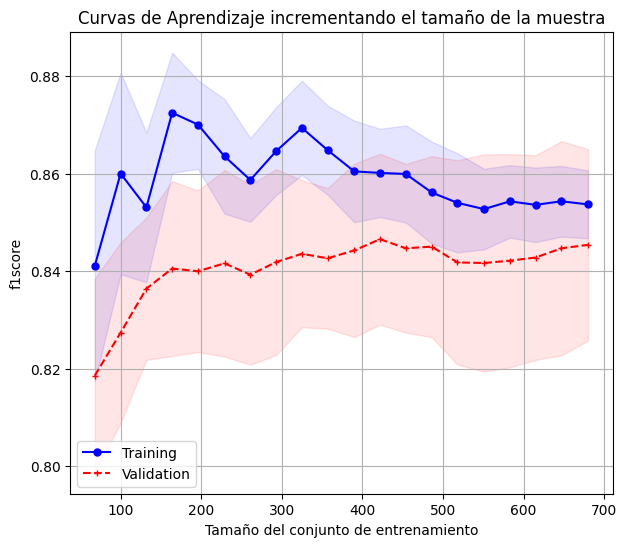

In [91]:
# Verifiquemos las curvas de entrenamiento que se obtienen con los datos de 
# entrenamiento y validación X_train, para el modelo de regresión logística:


print('Curvas de aprendizaje del modelo de Regresión Logística:')
mi_ModeloYCurvas_RegLog(X_train)

##### Curvas de validación:

In [92]:
def mi_ValidationCurvePlot_DecTree(max_depth_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(max_depth_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(max_depth_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(max_depth_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(max_depth_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje Incrementando el Número de Hojas')
    plt.xlabel('Número de Hojas')
    plt.ylabel('f1score')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [93]:
def mi_ModeloYCurvas_DecTree(Xin):
       # Se usa el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 0.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = DecisionTreeClassifier()

       #S define el pipeline como se indicó:

       mi_pipe = Pipeline(steps = [('escalar', MinMaxScaler(feature_range=(1,2))),('modelo', modelo)])


       #Se aplica validación cruzada estratificada y con repeticiones.

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)


       # Genera un arreglo con los 20 valores de los tamaños de muestra:
       
       delta_train_sz = np.linspace(1, 20, 20)

       tr_scores, val_scores = validation_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        scoring = make_scorer(mi_f1score),
                                                        param_name = 'modelo__max_depth',
                                                        param_range = delta_train_sz
                                                        )
       
       # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
       ######################################################################


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_ValidationCurvePlot_DecTree(delta_train_sz, tr_scores, val_scores)

Curvas de validación del modelo de Árboles de Decisión:


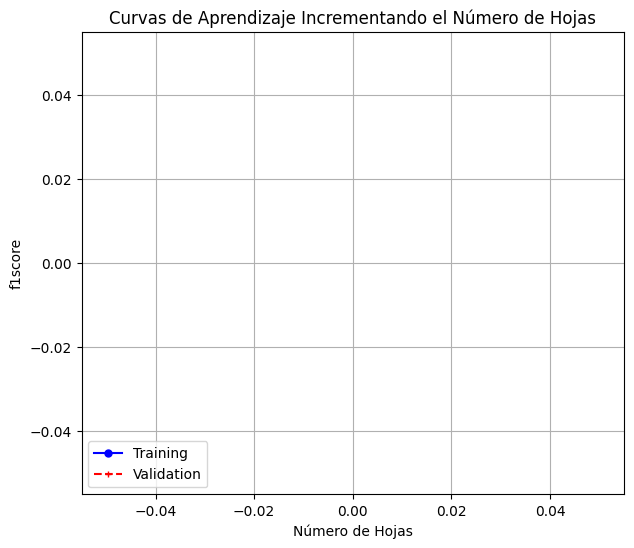

In [94]:
# Verifiquemos las curvas de entrenamiento que se obtienen con los datos de 
# entrenamiento y validación X_train, para el modelo de Árboles de Decisión:


print('Curvas de validación del modelo de Árboles de Decisión:')
mi_ModeloYCurvas_DecTree(X_train)

# **Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. Puedes consultar su documentación de GridSearchCV en la siguiente liga:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html 

1. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.
2. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.
3. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones.
4. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.
5. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones. NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo.
6. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento. 

# **Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te 
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación:
1. Obtener el  modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.
2. Obtener el  modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.
3. Obtener el  modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. 

In [95]:
None

### **Fin de la Actividad de la semana 6.**

---